Import all necessary modules

In [1]:
import numpy as np
import pandas as pd
import missingno
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

<h2>Missing Data Analysis</h2>

Run the next cell. 

In [2]:
pd.options.display.max_rows = 81

Read the dataset of House Price Train

In [3]:
df = pd.read_csv('../data/House Price Train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


use isna() and sum() functions to get the numbers of missing values in each column. 

In [4]:
df.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

Apply the previous one by dividing the total number of rows and by multiplying 100 so that you can get only percentage data.

In [5]:
df.isna().sum() / df.shape[0] * 100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType       59.726027
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

It is hard to understand the info about nan data among such number of columns. It would be better if we print only the columns containing at least one Nan value. There is a way to do this. Just apply the following:

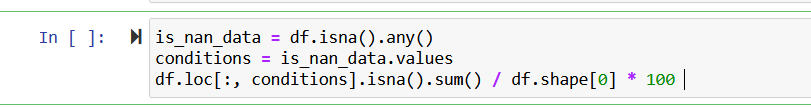

In [6]:
## any function indicates if there is one nan value at least
is_nan_data = df.isna().any()

## only boolean data is taken
conditions = is_nan_data.values

## choosing the dataframe transformed to percentage data
df.loc[:, conditions].isna().sum() / df.shape[0] * 100

LotFrontage     17.739726
Alley           93.767123
MasVnrType      59.726027
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

There are some columns suffering from nan values. So, which columns do you think are completely useless?

In [7]:
## it seems that Alley, FireplaceQu, PoolQC, Fence, and MiscFeature cannot be used for modelling. 

There is another way to analyze missing data - plotting a matrix with missingno.matrix method. Include parameters of label_rotation = 90, labels = column_names. You should also define column_names from dataset as a **_list_**. Put your comments about the plot to make sure which columns are completely useless? Compare your comments with your previous experience .

<Axes: >

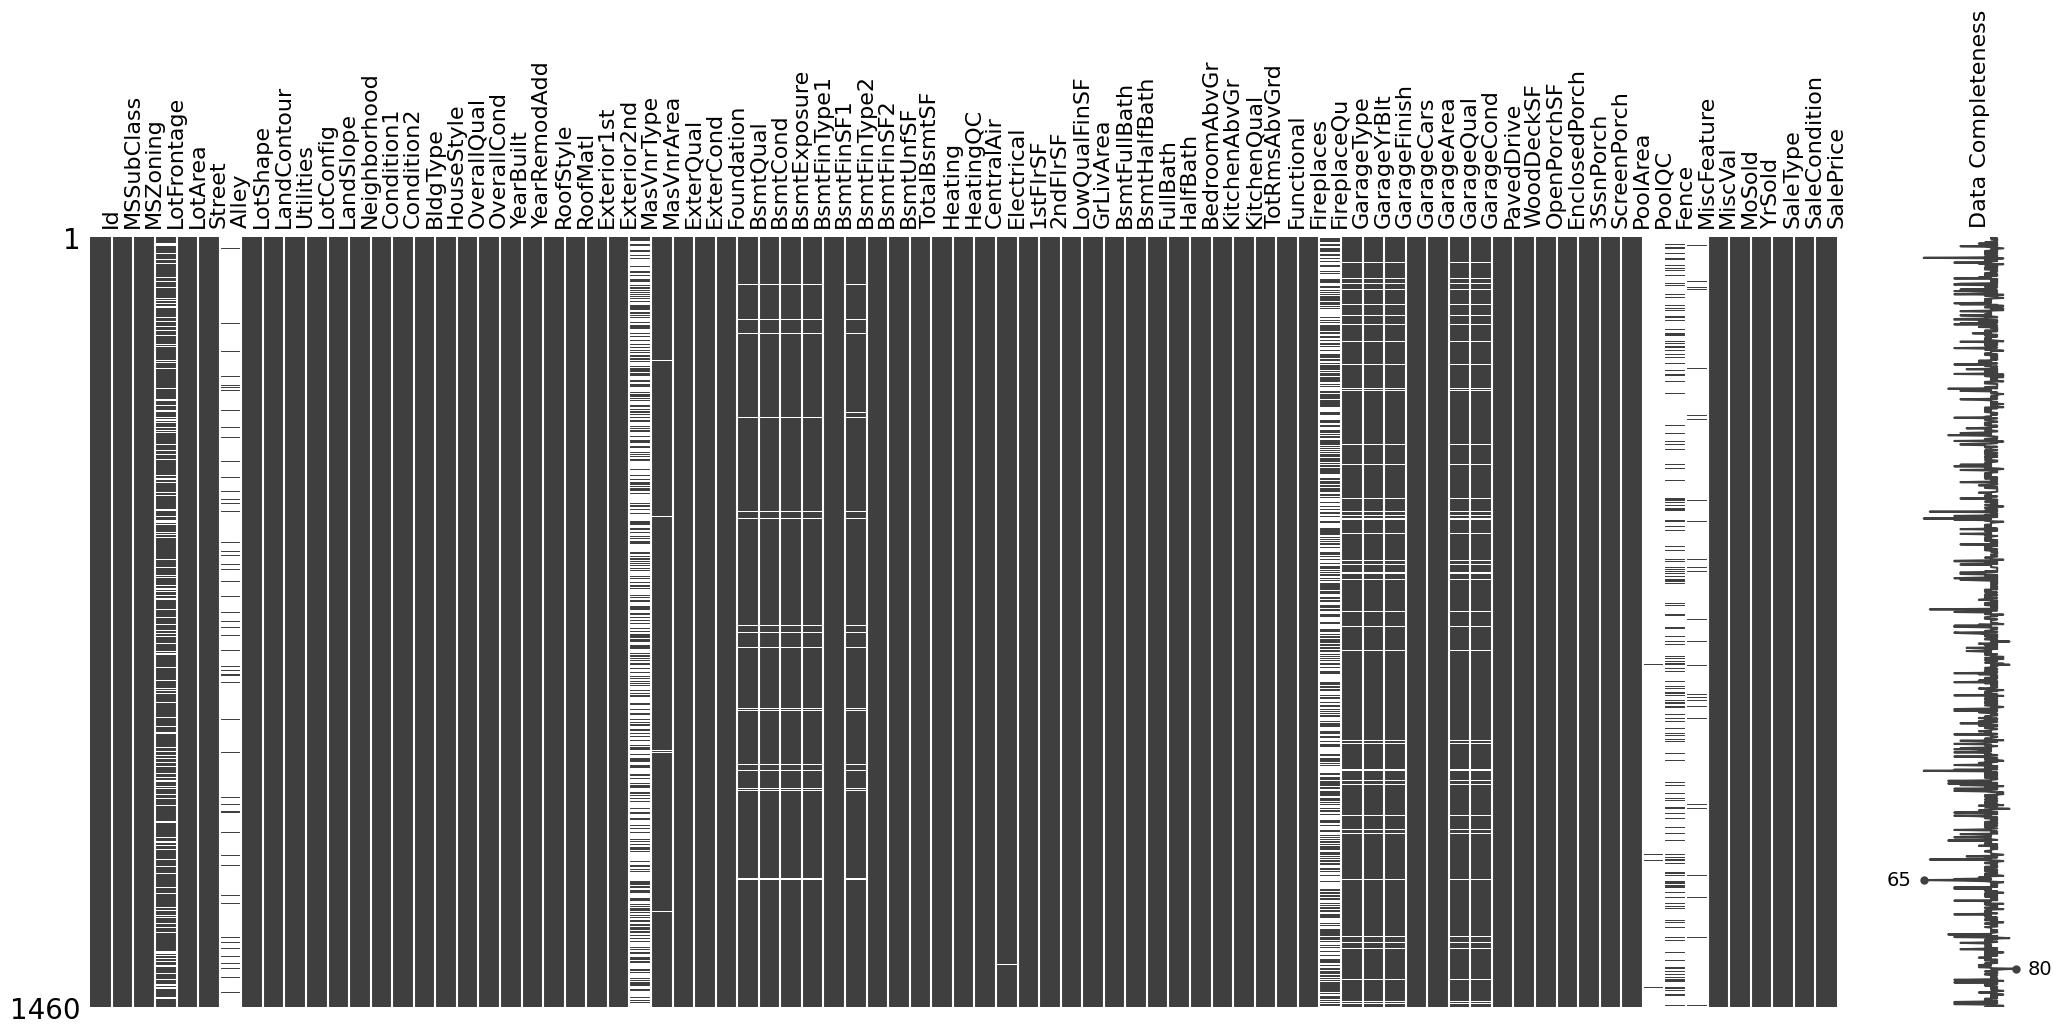

In [8]:
## Taking column names from the dataframe
columns = df.columns.to_list()

## Plotting the matrix with defined labels and rotation of 90 degrees
missingno.matrix(df, labels = columns, label_rotation = 90)

In [9]:
## White color indicates nan values. I think Alley, FireplaceQu, PoolQC, Fence, and MiscFeature have extreme level of white color.

It should be stated that not all nan data indicate some inconsistencies in the dataset. Sometimes, datapoints are intentionally left empty. For example, PoolQC - pool quality contains the highest number of missing datapoints. Why? Because in most houses, there is no pool so there is no point to evaluate the pool quality, and therefore, it is considered to be empty. But doesn't having pool mean higher price logically?

One more interesting point. GarageType, GarageYrBlt, GarageFinish, GarageQual, and GarageCond columns have the same percentage of 5.547945 %. Does it mean that nan values inside those columns indicate the case of having no garage? So do you think having garage can affect your price positively or negatively?

In [10]:
## Let's check this out
df['PoolQC'].value_counts(dropna = False)

PoolQC
NaN    1453
Gd        3
Ex        2
Fa        2
Name: count, dtype: int64

In [11]:
## We have 1453 missing data that can be replaced by 0
df['PoolQC'].fillna(0, inplace = True)

In [12]:
df['PoolQC'].value_counts()

PoolQC
0     1453
Gd       3
Ex       2
Fa       2
Name: count, dtype: int64

In [13]:
## In data description, it is given that Ex - Excellent, Gd - Good, Fa - Fair, Na - No Pool
## Now, let's convert it to numerical data
df['PoolQC'].replace({'Ex':3, 'Gd':2, 'Fa': 1}, inplace = True)

In [14]:
df['PoolQC'].value_counts()

PoolQC
0    1453
2       3
3       2
1       2
Name: count, dtype: int64

In [15]:
df.corr(numeric_only = True)['SalePrice']['PoolQC']

0.1196796650687592

In [16]:
## It seems that Pool Quality doesn't affect the price sufficiently, 
## but in any case, you should also consider such a case that not all nan values are actually unnecessary


Run the next cell. Ignore FutureWarning

In [17]:
pd.reset_option('all')

<h2>Encoding</h2>

Apply One Hot Encoder on LotShape column. Get feature names in a new variable, say **_columns_** additionally. Create a dataset containing only these encoded features. Also, use **_columns_** variable to define column names in new dataset.

In [18]:
ohe = OneHotEncoder().fit(df[['LotShape']])

## Transforming to numerical data
ohe_lot = ohe.transform(df[['LotShape']]).toarray()

## Getting column names 
column_names = ohe.get_feature_names_out()

In [19]:
## Creating dataframe version 
ohe_lot = pd.DataFrame(ohe_lot, columns = column_names)
ohe_lot

,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg
0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0
...,...,...,...,...
1455,0.0,0.0,0.0,1.0
1456,0.0,0.0,0.0,1.0
1457,0.0,0.0,0.0,1.0
1458,0.0,0.0,0.0,1.0


Call corr() function to analyze correlations. Do you see high correlations except for 1 values? Which columns have extremely high correlations with each other?

In [20]:
## There is a high negative correlation between LotShape_IR1 and LotShape_Reg - -0.925959
## That's not good
ohe_lot.corr()

,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg
LotShape_IR1,1.000000,-0.119701,-0.058481,-0.925959
LotShape_IR2,-0.119701,1.000000,-0.014116,-0.223509
LotShape_IR3,-0.058481,-0.014116,1.000000,-0.109197
LotShape_Reg,-0.925959,-0.223509,-0.109197,1.000000


Concatenate SalePrice column data with this new dataset. Call corr function to analyze correlations with only SalePrice.

In [21]:
## Concatenation
ohe_lot = pd.concat((ohe_lot, df['SalePrice']), axis = 1)

In [22]:
## LotShape_IR1 and LotShape_Reg has high affects on SalePrice positively and negatively in turn 
ohe_lot.corr()['SalePrice']

LotShape_IR1    0.223284
LotShape_IR2    0.126096
LotShape_IR3    0.036720
LotShape_Reg   -0.267672
SalePrice       1.000000
Name: SalePrice, dtype: float64

Apply One Hot Encoder on LotShape column again with additional parameter of drop = 'first'. Follow the same procedure, such as analyzing correlations among features and with SalePrice column. You see high correlations again? 

In [23]:
ohe = OneHotEncoder(drop = 'first').fit(df[['LotShape']])
ohe_lot = ohe.transform(df[['LotShape']]).toarray()
column_names = ohe.get_feature_names_out()
ohe_lot = pd.DataFrame(ohe_lot, columns = column_names)
ohe_lot

,LotShape_IR2,LotShape_IR3,LotShape_Reg
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
...,...,...,...
1455,0.0,0.0,1.0
1456,0.0,0.0,1.0
1457,0.0,0.0,1.0
1458,0.0,0.0,1.0


In [24]:
## There is no high correlation 
ohe_lot.corr()

,LotShape_IR2,LotShape_IR3,LotShape_Reg
LotShape_IR2,1.000000,-0.014116,-0.223509
LotShape_IR3,-0.014116,1.000000,-0.109197
LotShape_Reg,-0.223509,-0.109197,1.000000


In [25]:
ohe_lot = pd.concat((ohe_lot, df['SalePrice']), axis = 1)
ohe_lot.corr()['SalePrice']

LotShape_IR2    0.126096
LotShape_IR3    0.036720
LotShape_Reg   -0.267672
SalePrice       1.000000
Name: SalePrice, dtype: float64

<h2>Outlier Detection</h2>

Start with getting the shape of dataframe

In [26]:
df.shape

(1460, 81)

Remember in "Data Analysis with Pandas" we saw that there are some outliers in GrLivArea column? We didn't remove them in that tutorial. Now we have the ability to remove. Sketch a Box plot to visualize the case.

{'whiskers': [<matplotlib.lines.Line2D at 0x1f648d43af0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f648d70070>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f648d43850>],
 'medians': [<matplotlib.lines.Line2D at 0x1f648d705b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f648d70850>],
 'means': []}

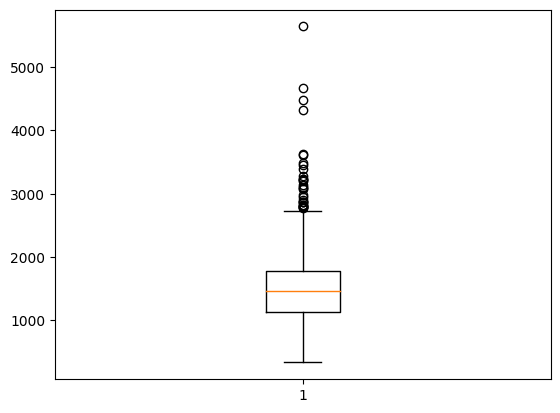

In [27]:
plt.boxplot(df['GrLivArea'])

Define your lower and upper limits based on quantiles. 

IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR

upper = Q3 + 1.5 * IQR

In [28]:
Q1, Q3 = df['GrLivArea'].quantile([0.25, 0.75])
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
lower, upper

(158.625, 2747.625)

Go back to Box plot and try to see the lower and upper boundaries in the sketch. You see similarities with your findings?

In [29]:
## For lower limit, it is hard to say, but upper limit seems the same with box plot's maximum limit

Now, it is time to remove outliers. You should use loc to choose the dataframe based on condition which will be free from outliers. Apply these conditions separately:

df['GrLivArea'] < upper

df['GrLivArea'] > lower

Do not use them both directly so as not to have a problem. 

In [30]:
df = df.loc[df['GrLivArea'] < upper]
df = df.loc[df['GrLivArea'] > lower]

In [31]:
# If you want to use these both in one line..
df = df.loc[(df['GrLivArea'] < upper) & (df['GrLivArea'] > lower)]

Get the shape of dataframe. What kind of changes you see now?

In [32]:
df.shape

(1429, 81)

Question: is it always good to remove outliers?

In [33]:
## Nope, if possible, replace them.

<h2>Feature Scaling</h2>

Before moving on scaling, we should choose features that we think are effective enough for modeling. For now, you are free to choose ones you think that can help, however, there are some methods in order to apply this procedure automatically, which is out of the scope of this tutorial.

Let's choose the ones having higher correlations with SalePrice. Define your own threshold and get the new dataset of specific features.

In [34]:
df.corr(numeric_only = True)['SalePrice'].sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.804186
GrLivArea        0.696162
GarageCars       0.654766
TotalBsmtSF      0.648681
GarageArea       0.638838
1stFlrSF         0.615310
YearBuilt        0.580922
YearRemodAdd     0.537274
FullBath         0.528040
GarageYrBlt      0.520343
TotRmsAbvGrd     0.495099
Fireplaces       0.465247
MasVnrArea       0.448216
BsmtFinSF1       0.416804
LotFrontage      0.352813
OpenPorchSF      0.330455
WoodDeckSF       0.315334
HalfBath         0.270953
BsmtFullBath     0.255452
LotArea          0.253177
2ndFlrSF         0.232434
BsmtUnfSF        0.194103
BedroomAbvGr     0.114485
ScreenPorch      0.087613
MoSold           0.072608
3SsnPorch        0.057198
PoolArea         0.023510
PoolQC           0.023466
BsmtFinSF2      -0.001651
YrSold          -0.022127
MiscVal         -0.023472
BsmtHalfBath    -0.030864
Id              -0.036630
LowQualFinSF    -0.080934
OverallCond     -0.097212
MSSubClass      -0.098603
KitchenAbvGr    -0.142548
EnclosedPorc

In [35]:
columns = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'GarageArea', 'SalePrice']
newdf = df[columns]

Now, apply MinMaxScaler to transform the data to new form of the data between only 0 and 1 values. It is better to apply this into features not target - SalePrice

In [36]:
X = newdf.drop('SalePrice', axis = 1)
y = newdf[['SalePrice']]

In [37]:
X = MinMaxScaler().fit_transform(X)
X

array([[0.66666667, 0.57429048, 0.5       , 0.26699938, 0.3942446 ],
       [0.55555556, 0.38731219, 0.5       , 0.39363693, 0.33093525],
       [0.66666667, 0.60601002, 0.5       , 0.28696195, 0.43741007],
       ...,
       [0.66666667, 0.83722871, 0.25      , 0.35932626, 0.18129496],
       [0.44444444, 0.31051753, 0.25      , 0.33624454, 0.17266187],
       [0.44444444, 0.38480801, 0.25      , 0.39176544, 0.19856115]])

Take one colum to visualize the case of distribution plot. You can also use scatter plot with two different columns.

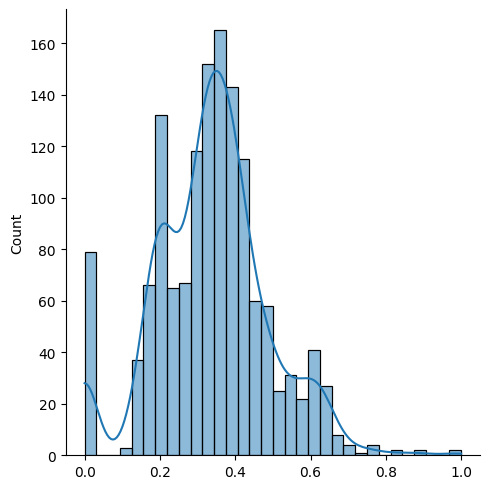

In [38]:
sns.displot(X[:, 4], kde = True)

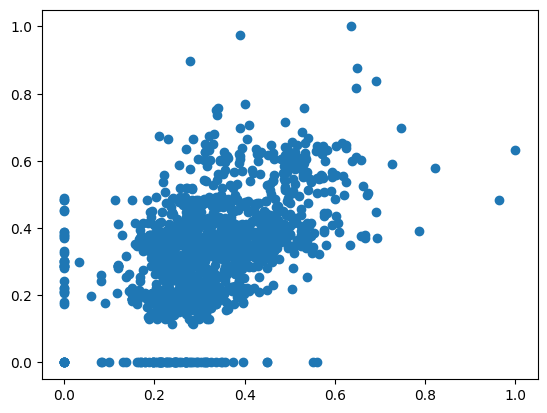

In [39]:
plt.scatter(X[:, 3], X[:, 4])

<h2>Optional Homework</h2>

Apply the following formula in your whole chosen dataframe to scale the data between 0 and 1. 

This homework can be done with pandas more easily since the axis is chosen 0 by default. However, for your good practice, it is advised to use NumPy version of the dataframe and solve the problem with basic understanding of axis terms.

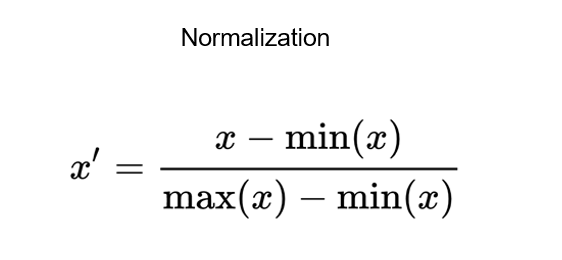